In [68]:
import subprocess
import coffea
import coffea.processor as processor
from coffea.nanoevents import BaseSchema
from coffea import hist
import uproot
import glob


#from Znn2017 import Znn2017

path = "/eos/cms/store/group/phys_higgs/hbb/ntuples/VHbbPostNano/2017/"



def xrdfsRecursive(fullpath):
    itemlist = [ filename for filename in subprocess.check_output(['xrdfs',"root://eoscms.cern.ch",'ls',fullpath]).decode().split("\n")[:-1]]
    if len(itemlist)==1 and itemlist[0]==fullpath:
        return itemlist

    newpaths = []
    for path in itemlist:
        newpaths+= xrdfsRecursive(path)
    return newpaths


class Sample():
    def __init__(self,name,xsec):
        self.name = name
        self.xsec = xsec
        self.genEventSum = 0
#         print(path+name+"/*/*/*")
        #self.files = glob.glob(path+name+"/*/*/*")[0]
        badFileNames = ["/eos/cms/store/group/phys_higgs/hbb/ntuples/VHbbPostNano/2017/V11/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/RunIIFall17NanoAODv4-PU2017_1282/210511_130812/0000/tree_38.root",
                       "/eos/cms/store/group/phys_higgs/hbb/ntuples/VHbbPostNano/2017/V11/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/RunIIFall17NanoAODv4-PU2017_1282/210511_130812/0000/tree_48.root",
                       "/eos/cms/store/group/phys_higgs/hbb/ntuples/VHbbPostNano/2017/V11/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8/RunIIFall17NanoAODv4-PU2017_1282/210511_130812/0000/tree_45.root"]
        
        self.filelist = ["root://eoscms.cern.ch//"+filename for filename in xrdfsRecursive(path+name) if filename.endswith(".root") and filename not in badFileNames]
#         self.filelist = [self.filelist]
        assert len(self.filelist)>0


samples = {
    "Znn2017": [Sample("V11/Z1JetsToNuNu_M-50_LHEZpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8",596.4),
               Sample("V11/Z1JetsToNuNu_M-50_LHEZpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8",17.98),
               Sample("V11/Z1JetsToNuNu_M-50_LHEZpT_250-400_TuneCP5_13TeV-amcnloFXFX-pythia8",2.057),
               Sample("V11/Z1JetsToNuNu_M-50_LHEZpT_400-inf_TuneCP5_13TeV-amcnloFXFX-pythia8",0.0224),
               Sample("V11/Z2JetsToNuNu_M-50_LHEZpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8",325.7),
                Sample("V11/Z2JetsToNuNu_M-50_LHEZpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8",29.76),
                Sample("V11-NLO/Z2JetsToNuNu_M-50_LHEZpT_250-400_TuneCP5_13TeV-amcnloFXFX-pythia8",5.166),
                Sample("V11/Z2JetsToNuNU_M-50_LHEZpT_400-inf_TuneCP5_13TeV-amcnloFXFX-pythia8",.08457),
               ],
    "Wln2017": [Sample("V11/W1JetsToLNu_LHEWpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8",2661),
               Sample("V11/W1JetsToLNu_LHEWpT_100-150_TuneCP5_13TeV-amcnloFXFX-pythia8",286.1),
               Sample("V11/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8",71.9),
#                Sample("V11/W1JetsToLNu_LHEWpT_250-400_TuneCP5_13TeV-amcnloFXFX-pythia8",8.05),
#                Sample("V11/W1JetsToLNu_LHEWpT_400-inf_TuneCP5_13TeV-amcnloFXFX-pythia8",0.885),
#                Sample("V11/W2JetsToLNu_LHEWpT_0-50_TuneCP5_13TeV-amcnloFXFX-pythia8",1615.0),
#                Sample("V11/W2JetsToLNu_LHEWpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8",1331),
#                Sample("V11/W2JetsToLNu_LHEWpT_100-150_TuneCP5_13TeV-amcnloFXFX-pythia8",277.7),
#                Sample("V11/W2JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8",105.9),
#                Sample("V11/W2JetsToLNu_LHEWpT_250-400_TuneCP5_13TeV-amcnloFXFX-pythia8",18.67),
#                Sample("V11/W2JetsToLNu_LHEWpT_400-inf_TuneCP5_13TeV-amcnloFXFX-pythia8",3.037),
#                Sample("V11-NLO_anigamov/WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8",54500),
#                Sample("V11-NLO_anigamov/WJetsToLNu_1J_TuneCP5_13TeV-amcatnloFXFX-pythia8",8750),
#                Sample("V11-NLO_anigamov/WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8",3010)]
]}

samplesToRun = samples["Wln2017"]
fileset = {}
for sample in samplesToRun:
    fileset[sample.name] = sample.filelist
# print(fileset)

class ProcessorSumw(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat("dataset","")
        self._accumulator = processor.dict_accumulator({
            'genEventSumw': processor.defaultdict_accumulator(float),
        })

    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, runs):
        dataset = runs.metadata['dataset']
        output = self.accumulator.identity()

        output['genEventSumw'][dataset]+=sum(runs.genEventSumw)
        return output

    def postprocess(self, accumulator):
        return accumulator

runs = processor.run_uproot_job(
    fileset,
    treename="Runs",
    processor_instance=ProcessorSumw(),
    executor=processor.iterative_executor,
    executor_args={"schema": BaseSchema },
    maxchunks=4,
)


scaleFactors = {}
for sample in samplesToRun:
    scaleFactors[sample.name] = sample.xsec/runs["genEventSumw"][sample.name]
#     sample.genEventSum = runs["genEventSumw"][sample.name]
print(scaleFactors)

Output()

Output()

{'V11/W1JetsToLNu_LHEWpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8': 1.2304927079860744e-07, 'V11/W1JetsToLNu_LHEWpT_100-150_TuneCP5_13TeV-amcnloFXFX-pythia8': 2.4299434618168778e-08, 'V11/W1JetsToLNu_LHEWpT_150-250_TuneCP5_13TeV-amcnloFXFX-pythia8': 2.8343373931351637e-08}


In [69]:
class Processor(processor.ProcessorABC):
    def __init__(self,stitchResults):
        self.stitchResults = stitchResults
        dataset_axis = hist.Cat("dataset", "dataset")

        Vpt_axis = hist.Bin("Vpt", "LHE_Vpt [GeV]", 40, 0, 500)
        VptBins_axis = hist.Bin("VptBins", "LHE_Vpt [GeV]", [0,50,100,150,250,400,2000])

        NpNLO_axis = hist.Bin("NpNLO","NpNLO",3,0,3)
        
        self._accumulator = processor.dict_accumulator({
            'LHE_Vpt': hist.Hist("Counts", dataset_axis, Vpt_axis),
            'reweighting': hist.Hist("Reweighting",dataset_axis,VptBins_axis,NpNLO_axis),
            'LHE_Vptstitched': hist.Hist("Counts", dataset_axis, Vpt_axis),

#             'LHE_Vpt': hist.Hist("Counts", dataset_axis, Vpt_axis, NpNLO_axis),
#             'LHE_NpNLO': hist.Hist("Counts", dataset_axis, Vpt_axis),
        })
    @property
    def accumulator(self):
        return self._accumulator

    def process(self, events):
        output = self.accumulator.identity()
        dataset = events.metadata["dataset"]
#         events = events[events.LHE.NpNLO==2]
        Vpt = events.LHE.Vpt
        nj = events.LHE.NpNLO
        output['LHE_Vpt'].fill(dataset=dataset, Vpt=Vpt,weight=events.genWeight)
        output['reweighting'].fill(dataset=dataset,VptBins=Vpt,NpNLO=events.LHE.NpNLO)

        if self.stitchResults!=None:
            tot=stitchResults["reweighting"].sum("dataset",overflow="all").values(overflow="all")[()][VptBins_axis.index(Vpt),NpNLO_axis.index(nj)]
            sampletot=stitchResults["reweighting"].values(overflow="all")[str(dataset),][VptBins_axis.index(Vpt),NpNLO_axis.index(nj)]
            output['LHE_Vptstitched'].fill(dataset=dataset, Vpt=Vpt,weight=events.genWeight*sampletot/tot)

        return output

    def postprocess(self, accumulator):
        accumulator["LHE_Vpt"].scale(scaleFactors,axis="dataset")
        if self.stitchResults!=None:
            accumulator["LHE_Vptstitched"].scale(scaleFactors,axis="dataset")

        return accumulator

output = processor.run_uproot_job(fileset=fileset,
        treename="Events",
        processor_instance=Processor(stitchResults=None),
        executor = processor.futures_executor,
        executor_args={ 'schema': processor.NanoAODSchema,"workers": 4},
#         executor = processor.iterative_executor,
#         executor_args={ 'schema': processor.NanoAODSchema},

       #executor=processor.dask_executor,
       #executor_args={'client': client, 'schema': processor.NanoAODSchema},
       chunksize=250000)


Output()

Output()

/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Muon_fsrPhotonIdx => FsrPhoton
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-

/opt/conda/lib/python3.8/site-packages/coffea/hist/plot.py:333: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


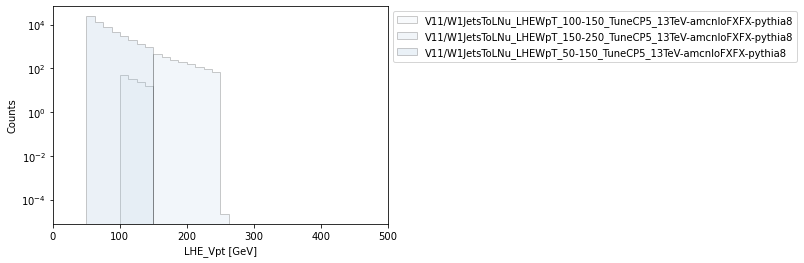

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
fig, ax = plt.subplots()
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
colors = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
ax.set_prop_cycle(cycler('color',colors))
ax.semilogy(True)
hist.plot1d(output["LHE_Vpt"],stack=False,ax=ax,line_opts=None,fill_opts={'alpha':0.2,'edgecolor': (0,0,0,0.3)},clear=False)
# hist.plot2d(output["LHE_Vpt"],ax=ax,xaxis="LHE_Vpt",clear=False)

leg = ax.legend(bbox_to_anchor=(1,1), loc="upper left")


In [71]:
output["reweighting"].values()[str(dataset),]
# help(output["reweighting"])
# VptBins_axis.index(2.4)
VptBins_axis = hist.Bin("VptBins", "LHE_Vpt [GeV]", [0,50,100,150,250,400,2000])

NpNLO_axis = hist.Bin("NpNLO","NpNLO",4,0,4)
# print(dataset)
# print(output["reweighting"].values(overflow="all"))
Vpt,nj = 149,2
# print(VptBins_axis.index(Vpt),NpNLO_axis.index(nj))
tot=output["reweighting"].sum("dataset",overflow="all").values(overflow="all")[()][VptBins_axis.index(Vpt),NpNLO_axis.index(nj)]
sampletot=output["reweighting"].values(overflow="all")[str(dataset),][VptBins_axis.index(Vpt),NpNLO_axis.index(nj)]

KeyError: ('V11/W2JetsToLNu_LHEWpT_50-150_TuneCP5_13TeV-amcnloFXFX-pythia8',)

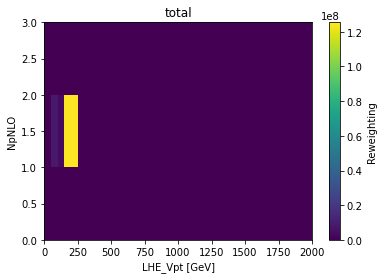

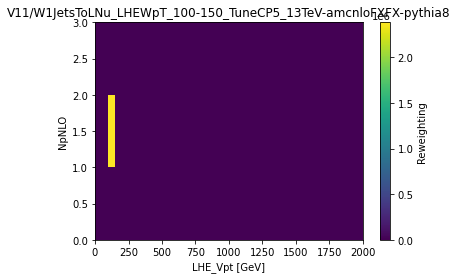

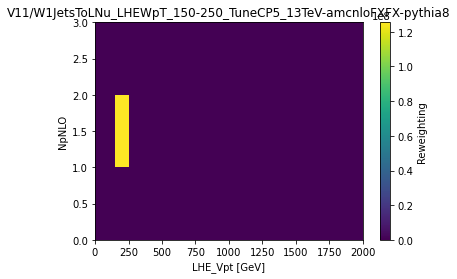

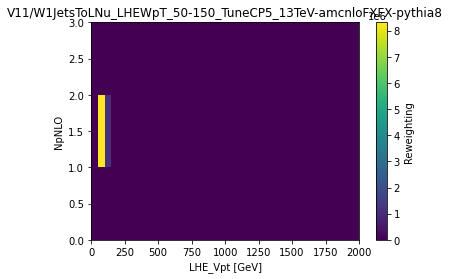

In [72]:
stitchResults = output
haveStitchResults = True
# dataset="V11-NLO_anigamov/WJetsToLNu_0J_TuneCP5_13TeV-amcatnloFXFX-pythia8"
totalWeightSum = output["reweighting"].sum("dataset")
hist.plot2d(output["reweighting"].sum("dataset"),xaxis="VptBins")
plt.title("total")
for dataset in output["reweighting"].identifiers(axis="dataset"):
    hist.plot2d(output["reweighting"][dataset].sum("dataset"),xaxis="VptBins")
    plt.title(dataset)

# Apply and Check stitching

In [ ]:
output = processor.run_uproot_job(fileset=fileset,
        treename="Events",
        processor_instance=Processor(stitchResults=stitchResults),
        executor = processor.futures_executor,
        executor_args={ 'schema': processor.NanoAODSchema,"workers": 4},
#         executor = processor.iterative_executor,
#         executor_args={ 'schema': processor.NanoAODSchema},

       #executor=processor.dask_executor,
       #executor_args={'client': client, 'schema': processor.NanoAODSchema},
       chunksize=250000)

Output()

/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Muon_fsrPhotonIdx => FsrPhoton
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
fig, ax = plt.subplots()
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
colors = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
ax.set_prop_cycle(cycler('color',colors))
ax.semilogy(True)
hist.plot1d(output["LHE_Vptstitched"],stack=True,ax=ax,line_opts=None,fill_opts={'alpha':0.2,'edgecolor': (0,0,0,0.3)},clear=False)
# hist.plot2d(output["LHE_Vpt"],ax=ax,xaxis="LHE_Vpt",clear=False)

leg = ax.legend(bbox_to_anchor=(1,1), loc="upper left")

# Now, export to json

In [52]:
import json

exportDict = {}
VptBins = [str(k).split(",")[0][1:] for k in VptBins_axis[1:]]
NpNLOBins = [str(k).split(",")[0][1:] for k in NpNLO_axis[1:]]

for sample in output["LHE_Vptstitched"].values().keys():
    weightList = output["reweighting"][sample].values()[sample].tolist()
#     print(weightList)
    exportDict[str(sample[0])] = {}
    
    for i,row in enumerate(weightList):
        exportDict[str(sample[0])]["Vpt"+VptBins[i]] = {}
#         print(exportDict)
        for j,column in enumerate(row):
            exportDict[str(sample[0])]["Vpt"+VptBins[i]]["NpNLO"+NpNLOBins[j]] = column

    break

json.dumps(exportDict)

'{"V11-NLO_anigamov/WJetsToLNu_2J_TuneCP5_13TeV-amcatnloFXFX-pythia8": {"Vpt0": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 411425.0, "NpNLO3": 0.0}, "Vpt50": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 304536.0, "NpNLO3": 0.0}, "Vpt100": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 104649.0, "NpNLO3": 0.0}, "Vpt150": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 57736.0, "NpNLO3": 0.0}, "Vpt250": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 11674.0, "NpNLO3": 0.0}, "Vpt400": {"NpNLO0": 0.0, "NpNLO1": 0.0, "NpNLO2": 1883.0, "NpNLO3": 0.0}}}'